In [1]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


/home/lizhen09/miniconda2/envs/python27/lib/python2.7/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


In [2]:
sys.path.insert(0,os.getcwd()+"/../../src/main")

In [3]:
!echo $LOCAL

/local/5219345


In [4]:
!mkdir $LOCAL/sandbox

mkdir: cannot create directory ‘/local/5219345/sandbox’: File exists


In [5]:
HOME=os.environ['LOCAL']+"/sandbox"
os.chdir(HOME)
os.getcwd()

'/local/5219345/sandbox'

In [6]:
os.environ['LANLEP_HOME']=HOME

In [7]:
import data

In [8]:
!ls /home/lizhen09/lanlep2019/input/feat/*.parq | grep -v offset_.parq | xargs -L1  -IINPUT cp INPUT {HOME}/input/feat/

In [9]:
!cp /home/lizhen09/lanlep2019/input/feat/*.pkl {HOME}/input/feat/

In [9]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['fwv']
    traintest = data.TrainTest('coveragesp', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [10]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 100)

In [11]:
datadf=pd.concat([traintest.traindf, traintest.ydf],axis=1)
print datadf.shape
datadf.head()

(258714, 101)


fwv_0     fwv_1     fwv_2     fwv_3     fwv_4  \
index                                                                  
quake_13_o13686688  0.153793  0.252002  0.115362 -0.135008  0.084726   
quake_11_o10971263  0.186869  0.232279  0.116231 -0.128347  0.081842   
quake_13_o2300617   0.205687  0.200959  0.109438 -0.078377  0.043451   
quake_11_o1146388   0.185285  0.209010  0.129064 -0.108109  0.060230   
quake_03_o14959363  0.171327  0.221359  0.125176 -0.098631  0.061466   

                       fwv_5     fwv_6     fwv_7     fwv_8     fwv_9  ...  \
index                                                                 ...   
quake_13_o13686688 -0.021867 -0.005263  0.239939  0.171421 -0.142894  ...   
quake_11_o10971263 -0.029581 -0.003840  0.226696  0.162483 -0.092634  ...   
quake_13_o2300617  -0.137988 -0.009339  0.158783  0.181458 -0.020147  ...   
quake_11_o1146388  -0.080226 -0.029042  0.178731  0.170022 -0.066760  ...   
quake_03_o14959363 -0.084572 -0.004272  0.181916  0.169383 -0.055399  ...   

                      fwv_91    fwv_92    fwv_93    fwv_94    fwv_95  \
index                                                                  
quake_13_o13686688  0.180867  0.027012  0.044774  0.028781  0.006128   
quake_11_o10971263  0.181602  0.060105  0.039644 -0.010936  0.023625   
quake_13_o2300617   0.184665  0.091970  0.057466 -0.050179  0.015093   
quake_11_o1146388   0.198318  0.072047  0.046459 -0.020315  0.025861   
quake_03_o14959363  0.167620  0.064355  0.057553 -0.031640  0.023935   

                      fwv_96    fwv_97    fwv_98    fwv_99         y  
index                                                                 
quake_13_o13686688  0.023644 -0.116737 -0.010711  0.164185  0.905300  
quake_11_o10971263  0.018926 -0.114227  0.001870  0.113800  1.610999  
quake_13_o2300617  -0.012664 -0.122463  0.020853  0.062428  3.863199  
quake_11_o1146388   0.020317 -0.107892  0.026311  0.074932  4.163498  
quake_03_o14959363  0.004552 -0.120380  0.007215  0.118175  0.575696  

[5 rows x 101 columns]

In [12]:
datadf= datadf[~datadf.index.duplicated(keep='first')]
datadf.shape

(258653, 101)

In [13]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                    
quake_13_o13686688     13
quake_11_o10971263     11
quake_13_o2300617      13
quake_11_o1146388      11
quake_03_o14959363      3

In [14]:
qdf=qdf[~qdf['index'].isin({0,16})]
datadf=datadf.loc[qdf.index]
ydf=datadf['y']
datadf=datadf.drop('y',axis=1)
qdf.shape,datadf.shape,ydf.shape

((258653, 1), (258653, 100), (258653,))

In [15]:
qlen=qdf['index'].value_counts().to_dict()
str(qlen)

'{1: 19237, 2: 19235, 3: 16764, 4: 19241, 5: 13677, 6: 9844, 7: 19238, 8: 13101, 9: 19238, 10: 19233, 11: 19234, 12: 16648, 13: 15643, 14: 19237, 15: 19083}'

In [16]:
quakes=set(qdf['index'])
quakes

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

In [17]:
def make_distance(trainX,testX):
    a=np.expand_dims(trainX,1)
    print a.shape
    b=np.expand_dims(testX,0)
    print b.shape
    c=a-b
    print c.shape
    d=np.sqrt(np.sum(c*c, axis=2))
    print  d.shape
    return d
def make_distance2(trainX,testX):
    lst =[] 
    for i in range(len(testX)):
        x=testX[i:i+1]
        c=trainX-x
        d=np.sqrt(np.sum(c*c, axis=1))
        #print c.shape,x.shape,trainX.shape,d.shape        
        lst.append(d)
    return np.array(lst).T
def dmean2(a,n, y):
    aindex=np.argsort(a) 
    a=aindex[:n]
    y=y[a]
    a=(a-np.mean(a))/np.std(a)
    a=np.exp(-a)
    a=a/np.sum(a)
    return np.sum(a*y)
def dmean(v,ns,rawy):
    if not isinstance(ns, list):
        ns=[ns]
    for n in ns:
        assert n>0
    aindex=np.argsort(v) 
    lst=[]
    for n in ns:
        a=aindex[:n]
        y=rawy[a]
        a=(a-np.mean(a))/np.std(a)
        a=np.exp(-a)
        a=a/np.sum(a)
        r=np.sum(a*y)
        lst.append(r)
    return lst

In [18]:
results={}

In [19]:
%%time 
for qno in quakes:
    print qno
    testX=testdf.values
    print "test", testX.shape
    
    traindf=datadf[qdf['index']==qno]
    trainX=traindf.values
    trainy=ydf.loc[traindf.index].values
    print "train", trainX.shape,trainy.shape

    distances=make_distance2(trainX,testX)
    print distances.shape

    n=3000
    predy=np.apply_along_axis(lambda u: dmean2(u,n,trainy),axis=0,arr=distances)
    predy=np.array(predy)
    print predy.shape
    results[qno]=predy
    #break

1
test (2624, 100)
train (19237, 100) (19237,)
(19237, 2624)
(2624,)
2
test (2624, 100)
train (19235, 100) (19235,)
(19235, 2624)
(2624,)
3
test (2624, 100)
train (16764, 100) (16764,)
(16764, 2624)
(2624,)
4
test (2624, 100)
train (19241, 100) (19241,)
(19241, 2624)
(2624,)
5
test (2624, 100)
train (13677, 100) (13677,)
(13677, 2624)
(2624,)
6
test (2624, 100)
train (9844, 100) (9844,)
(9844, 2624)
(2624,)
7
test (2624, 100)
train (19238, 100) (19238,)
(19238, 2624)
(2624,)
8
test (2624, 100)
train (13101, 100) (13101,)
(13101, 2624)
(2624,)
9
test (2624, 100)
train (19238, 100) (19238,)
(19238, 2624)
(2624,)
10
test (2624, 100)
train (19233, 100) (19233,)
(19233, 2624)
(2624,)
11
test (2624, 100)
train (19234, 100) (19234,)
(19234, 2624)
(2624,)
12
test (2624, 100)
train (16648, 100) (16648,)
(16648, 2624)
(2624,)
13
test (2624, 100)
train (15643, 100) (15643,)
(15643, 2624)
(2624,)
14
test (2624, 100)
train (19237, 100) (19237,)
(19237, 2624)
(2624,)
15
test (2624, 100)
train (19083

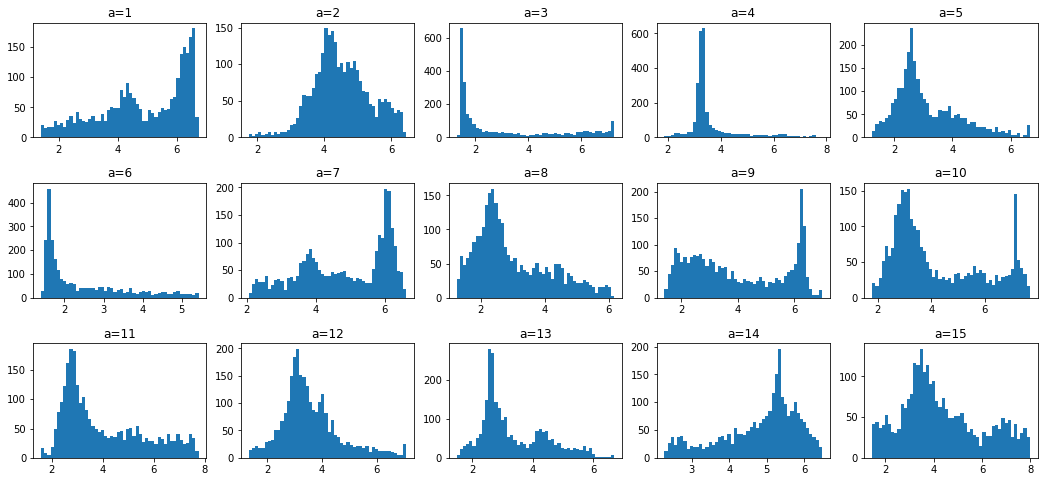

In [21]:
fig, axs = plt.subplots(figsize=(18,8), 
                        nrows=3, ncols=5,     # fix as above
                        gridspec_kw=dict(hspace=0.4)) # Much control of gridspec

for ax,(k,v) in zip(axs.flatten(), results.items()):
    ax.hist(v,bins=50)
    ax.set_title('a=%d'%k)

In [22]:
for k,pred in results.items():
    a=pd.DataFrame(pred,index=testdf.index).reset_index()
    a.columns=["seg_id","time_to_failure"]
    a.to_csv("/home/lizhen09/lanlep2019//input/sub/test_nnfwv_lt10_q{}.csv".format(k),index=None)

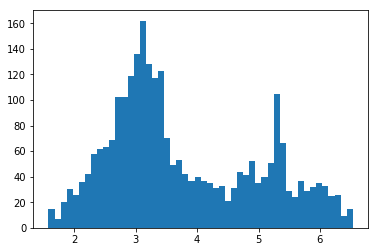

In [23]:
plt.hist(np.median(np.array(results.values()),0),bins=50);

In [24]:
pred=np.median(np.array(results.values()),0)
print np.mean(pred),np.median(pred)
a=pd.DataFrame(pred,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.to_csv("/home/lizhen09/lanlep2019//input/sub/test_nnfwv_lt10_qmed.csv".format(k),index=None)

3.7648730239420543 3.3721121839087864


In [26]:
%%time 
for qno in [111]:
    print qno
    testX=testdf.values
    print "test", testX.shape
    
    traindf=datadf
    trainX=traindf.values
    trainy=ydf.loc[traindf.index].values
    print "train", trainX.shape,trainy.shape

    distances=make_distance2(trainX,testX)
    print distances.shape

    n=3000
    predy=np.apply_along_axis(lambda u: dmean2(u,n,trainy),axis=0,arr=distances)
    predy=np.array(predy)
    print predy.shape
    #break

111
test (2624, 100)
train (258653, 100) (258653,)
(258653, 2624)
(2624,)
CPU times: user 8min 7s, sys: 2min 41s, total: 10min 48s
Wall time: 4min 21s


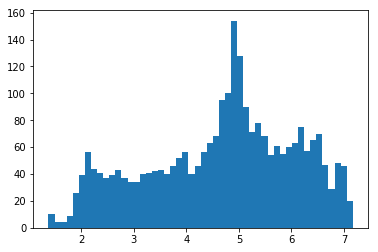

In [27]:
plt.hist(predy,bins=50);

In [28]:
a=pd.DataFrame(predy,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.to_csv("/home/lizhen09/lanlep2019//input/sub/test_fwv_lt10_nnall.csv" ,index=None)

111
test (2624, 100)
train (210333, 100) (210333,)
(210333, 2624)
(2624,)
CPU times: user 5min 52s, sys: 2min 12s, total: 8min 4s
Wall time: 3min 17s


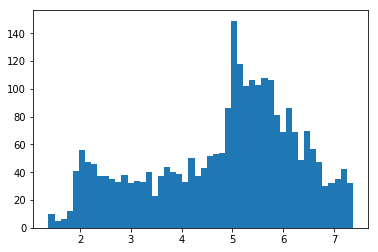

In [29]:
%%time 
for qno in [111]:
    print qno
    testX=testdf.values
    print "test", testX.shape
    
    traindf=datadf[~qdf['index'].isin({2,4,6})]
    trainX=traindf.values
    trainy=ydf.loc[traindf.index].values
    print "train", trainX.shape,trainy.shape

    distances=make_distance2(trainX,testX)
    print distances.shape

    n=3000
    predy=np.apply_along_axis(lambda u: dmean2(u,n,trainy),axis=0,arr=distances)
    predy=np.array(predy)
    print predy.shape
    #break
plt.hist(predy,bins=50); 
a=pd.DataFrame(predy,index=testdf.index).reset_index()
a.columns=["seg_id","time_to_failure"]
a.to_csv("/home/lizhen09/lanlep2019//input/sub/test_fwv_nnall_lt10_rm-2.csv" ,index=None)